In [19]:
import sys
#sys.path.insert(1,'/Users/kailaiwang/Documents/AEI_Research/TEOBResumS/eccentric/python')
sys.path.insert(1,'/work/kailai.wang/teobresums/Python')
import EOBRun_module
import SEOBNRE
import sxs
import Functions as fun
from importlib import reload
fun=reload(fun)
import argparse
from configparser import ConfigParser
import corner
import os
import pandas as pd
import glob
import json
import numpy as np
from pycbc import psd
import h5py
from scipy.interpolate import interp1d
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import dynesty
from dynesty import plotting as dyplot
from pycbc.waveform import td_approximants
import pycbc.psd
from pycbc.pool import choose_pool
import csv
##########################
import aux_fun as functions
import SXS_module as sxs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize,curve_fit
import romspline
import h5py
import math
from dynesty.utils import resample_equal
import corner
import json
import random

In [20]:
import csv
from os import listdir


def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#filenames = find_csv_filenames("export_folder/sxs_mismatch_seobhm")
filenames = find_csv_filenames("export_folder/sxs_mismatch_tseob_new/")

data_file_list=[]
info_file_list=[]

for name in filenames:
    if "rit_mismatch" in name:
        #data_file_list.append("export_folder/sxs_mismatch_seobhm/"+name)
        data_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)

for name in filenames:
    if "model" in name:
        #info_file_list.append("export_folder/sxs_mismatch_seobhm/"+name)
        info_file_list.append("export_folder/sxs_mismatch_tseob_new/"+name)

data_list=[]

for i in data_file_list:
    with open(i, newline='') as csvfile:
        data_read = list(csv.reader(csvfile))
        data_list.append(data_read)



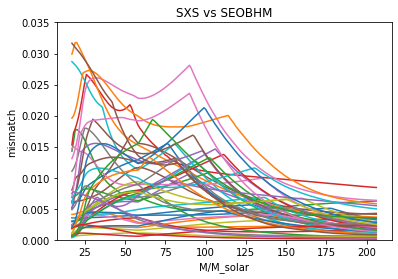

total analyzed:  46


In [21]:
import matplotlib.pyplot as plt
import numpy as np

name_list=[]
mismatch_list=[]
mass_list=[]

for i in range(0,len(data_list)):
    mismatch=[]
    mass=[]
    name=""
    for j in range(1,len(data_list[i])):
        if data_list[i][j][1]!='':
            mismatch_item=float(data_list[i][j][1])
            # if mismatch_item>=0.03:
            #     print("Problem." + str(i))
            mass_item=float(data_list[i][j][0])
            mismatch.append(mismatch_item)
            mass.append(mass_item)
    mismatch_list.append(mismatch)
    mass_list.append(mass)
    name_list.append(data_file_list[i])


    
for i in range(0,len(name_list)):
    plt.plot(mass_list[i],mismatch_list[i])
    plt.ylabel("mismatch")
    plt.xlabel("M/M_solar")
    plt.ylim(0,0.035)
    # plt.plot(mass_list[i],mismatch_list[i], label=data_file_list[i])
    # plt.legend(bbox_to_anchor=(0,0), loc="lower left")
#plt.ylim(0,0.1)
#plt.title("SXS vs TSEOB")
plt.title("SXS vs SEOBHM")
plt.show()
print("total analyzed: ", len(name_list))



In [22]:
# print(data_file_list[3])
# print(data_file_list[11])
# print(data_file_list[40])
# print(data_file_list[45])
# #1388, 1361, 0088(nope), 1359

In [25]:
#Make LATEX TABLE
max_mismatch_list = []
table_list=[]
for i in range(0,len(name_list)):
    ecc_bvals=-1
    f_bvals=-1
    max_mismatch = -1
    for k in mismatch_list[i]:
        if float(k)>max_mismatch:
            max_mismatch=k
    #find info_list for name_list[i]
    for j in range(0,len(info_file_list)):
        if name_list[i][67:71] in info_file_list[j]:
            #print(name_list[i][67:71] + " found " + info_file_list[j])
            with open(info_file_list[j], newline='') as csvfile:
                # print(name_list[i][67:71], info_file_list[j])
                info_read = list(csv.reader(csvfile))
                ecc_est = info_read[1][7]
                ecc_meta = info_read[1][6]
                ecc_bvals=info_read[1][9]
                f_bvals=info_read[1][10]
                f_bvals_new=fun.f_to_NR(float(f_bvals)/2.,100)*2*np.pi
    result = name_list[i][67:71] + ": " + " (TEOB) " + "ecc_meta: " + str(np.round(float(ecc_meta),5)) + " ecc_est: " + str(np.round(float(ecc_est),5)) +" ecc_bvals: " + str(np.round(float(ecc_bvals),5)) 
    print(result)
                
#+ " f0_bvals " + str(np.round(float(f_bvals_new),5))





1365:  (TEOB) ecc_meta: 0.11417 ecc_est: 0.0635 ecc_bvals: 0.2205
1373:  (TEOB) ecc_meta: 0.20867 ecc_est: 0.09922 ecc_bvals: 0.32644
0089:  (TEOB) ecc_meta: 0.06006 ecc_est: 0.04836 ecc_bvals: 0.11749
1388:  (TEOB) ecc_meta: 0.04309 ecc_est: 0.03079 ecc_bvals: 0.06121
1149:  (TEOB) ecc_meta: 0.04619 ecc_est: 0.03081 ecc_bvals: 0.1123
0179:  (TEOB) ecc_meta: 0.03297 ecc_est: 0.01872 ecc_bvals: 0.00433
0078:  (TEOB) ecc_meta: 0.02153 ecc_est: 0.01439 ecc_bvals: 0.06135
0320:  (TEOB) ecc_meta: 0.02276 ecc_est: 0.01149 ecc_bvals: 0.03948
0105:  (TEOB) ecc_meta: 0.02202 ecc_est: 0.01538 ecc_bvals: 0.00983
1356:  (TEOB) ecc_meta: 0.19747 ecc_est: 0.09727 ecc_bvals: 0.14667
1360:  (TEOB) ecc_meta: 0.36357 ecc_est: 0.14797 ecc_bvals: 0.31774
1361:  (TEOB) ecc_meta: 0.33263 ecc_est: 0.14873 ecc_bvals: 0.2889
0309:  (TEOB) ecc_meta: 0.02932 ecc_est: 0.01599 ecc_bvals: 0.05671
1364:  (TEOB) ecc_meta: 0.07932 ecc_est: 0.0454 ecc_bvals: 0.16847
0091:  (TEOB) ecc_meta: 0.02164 ecc_est: 0.01607 ecc_

Make a table